In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
products = pd.read_csv('C:/Users/auror/Downloads/products.csv')
products

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt"
...,...,...,...,...,...,...,...,...
1255,1255,Trousers,Tracksuit Bottoms,XS,violet,91,67,"A violet coloured, XS sized, Tracksuit Bottoms..."
1256,1256,Trousers,Tracksuit Bottoms,S,violet,91,48,"A violet coloured, S sized, Tracksuit Bottoms ..."
1257,1257,Trousers,Tracksuit Bottoms,M,violet,91,73,"A violet coloured, M sized, Tracksuit Bottoms ..."
1258,1258,Trousers,Tracksuit Bottoms,L,violet,91,45,"A violet coloured, L sized, Tracksuit Bottoms ..."


In [12]:
X = products[['product_type','product_name','size','colour']]
Y = products['price']
X = pd.get_dummies(data=X, drop_first=True)
X

,product_type_Shirt,product_type_Trousers,product_name_Camp Collared,product_name_Cardigan,product_name_Cargo Pants,product_name_Casual Slim Fit,product_name_Chambray,product_name_Chinos,product_name_Coach,product_name_Cords,...,size_M,size_S,size_XL,size_XS,colour_green,colour_indigo,colour_orange,colour_red,colour_violet,colour_yellow
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1256,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1257,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1258,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
products.dtypes

product_ID       int64
product_type    object
product_name    object
size            object
colour          object
price            int64
quantity         int64
description     object
dtype: object

In [19]:
products.corr()

,product_ID,price,quantity
product_ID,1.000000,-0.352005,-0.006435
price,-0.352005,1.000000,0.069239
quantity,-0.006435,0.069239,1.000000


In [23]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1008, 46)
(252, 46)
(1008,)
(252,)


In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
print(model.intercept_)

90.00000000000001


In [26]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
product_type_Shirt,2.300000e+01
product_type_Trousers,1.040702e+01
product_name_Camp Collared,-1.000000e+00
product_name_Cardigan,2.800000e+01
product_name_Cargo Pants,5.592980e+00
product_name_Casual Slim Fit,-6.069300e-14
product_name_Chambray,-8.000000e+00
product_name_Chinos,-4.070196e-01
product_name_Coach,2.500000e+01
product_name_Cords,1.259298e+01


In [27]:
predictions = model.predict(X_test)
predictions

array([114., 109., 119., 111., 112., 114., 108., 109.,  92.,  90., 118.,
       106., 104., 110., 102., 119.,  95.,  98.,  96., 102., 104., 115.,
       112., 109.,  98., 105., 100., 111.,  92., 115., 116.,  95.,  90.,
       119.,  91., 118., 119., 114., 110.,  93., 117.,  99.,  98.,  90.,
       113., 114.,  98.,  99., 116., 102., 119., 105.,  99., 119., 115.,
       108.,  94.,  99., 119., 116.,  93., 114.,  95.,  92., 113., 113.,
       119.,  90.,  95.,  99., 116., 112.,  95., 114., 116., 112., 119.,
       113., 113., 111., 117., 108.,  93., 111.,  98., 110.,  92., 113.,
       111.,  92., 119., 114., 119., 113.,  94.,  90., 112., 118., 108.,
       105., 110., 106.,  91., 112., 113., 102., 118., 102., 113.,  96.,
        90., 110., 119., 115., 110., 115.,  91., 111.,  93., 104.,  96.,
       113.,  98., 112.,  94.,  92., 108., 113., 114., 115., 106.,  94.,
       108., 111., 100., 109.,  95.,  92., 104., 114., 118.,  99.,  92.,
       112., 110.,  90.,  93., 119., 109., 109., 11

C:\Users\auror\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

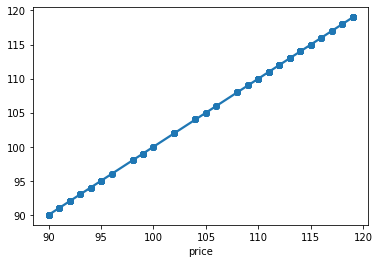

In [29]:
sns.regplot(Y_test,predictions)

In [31]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(Y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.167e+29
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:43:53   Log-Likelihood:                 28781.
No. Observations:                1008   AIC:                        -5.747e+04
Df Residuals:                     962   BIC:                        -5.724e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

C:\Users\auror\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


We can see that our model is appropiate to predict price since the R-squared is 1. The starting price is $90, and the biggest impact on the price is the product type. Setting our significance level as 0.01, product_name_Casual Slim Fit, size_M, size_XS, and all the colors except yellow aren't important attribute to our model. The sizes and colors have negligible effect on the price. 